In [1]:
# Import libraries
import pandas as pd
import pyreadstat as pyr

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wrangle2021 import Wrangler

In [2]:
# 14th analysis
#load df
df, meta = pyr.read_sav('afrobarometer_nigeria_rd8_2021.sav')
# Select specific columns from the Dataframe based on the information provided in the metadata
# and Replaces the code numbers with the actual values in each column using their actual name in the metadata
columns = ['REGION','Q20A', 'Q20B', 'Q20C']
df_new = df.copy()[columns]
for i in columns:
    x = meta.variable_value_labels[i]
    df_new[i].replace(x, inplace=True)
    


# Rename columns
df_new.columns = ['State', 'Reject one-party rule', 'Reject military rule', 'Reject one-man rule']

df_new.head()

,State,Reject one-party rule,Reject military rule,Reject one-man rule
0,IMO,Disapprove,Disapprove,Don’t know
1,FCT ABUJA,Strongly disapprove,Strongly disapprove,Strongly disapprove
2,FCT ABUJA,Strongly approve,Approve,Strongly disapprove
3,FCT ABUJA,Neither approve nor disapprove,Neither approve nor disapprove,Neither approve nor disapprove
4,FCT ABUJA,Strongly disapprove,Strongly disapprove,Strongly disapprove


In [3]:
# Instantiate wrangle class
wrangle = Wrangler()

In [4]:
data = wrangle.wrangle(columns=['REGION','Q20A', 'Q20B', 'Q20C'],rename=['State', 'Reject one-party rule', 'Reject military rule', 'Reject one-man rule'])

In [5]:
wrangle.get_frequency(columns=['Reject one-party rule', 'Reject military rule', 'Reject one-man rule'], df_new=data)

Strongly disapprove               0.585366
Disapprove                        0.222014
Approve                           0.096310
Strongly approve                  0.046279
Neither approve nor disapprove    0.031270
Don’t know                        0.018762
Name: Reject one-party rule, dtype: float64
Strongly disapprove               0.554722
Disapprove                        0.181363
Approve                           0.111320
Strongly approve                  0.070044
Neither approve nor disapprove    0.060663
Don’t know                        0.021263
Refused                           0.000625
Name: Reject military rule, dtype: float64
Strongly disapprove               0.569106
Disapprove                        0.258912
Approve                           0.075047
Neither approve nor disapprove    0.057536
Strongly approve                  0.021263
Don’t know                        0.018136
Name: Reject one-man rule, dtype: float64


In [6]:
df_new = wrangle.remove(columns=['Reject one-party rule', 'Reject military rule', 'Reject one-man rule'], df_new=data)

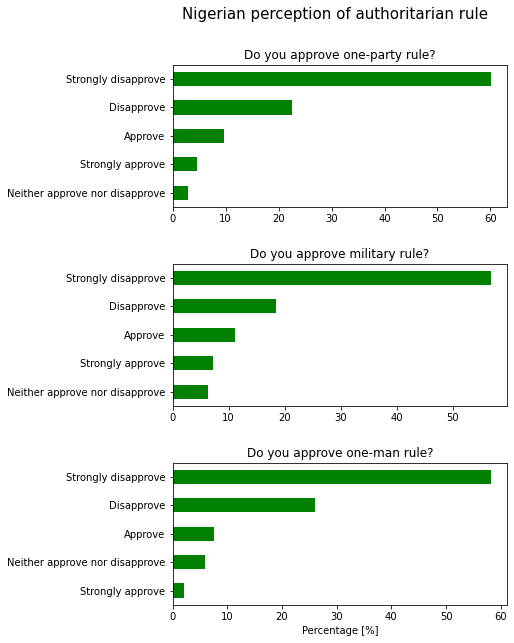

In [7]:
fig = plt.figure()

# Needed to add spacing between 1st and 2nd row
# Add a margin between the main title and sub-plots
fig.subplots_adjust(hspace=0.4, top=2)

# Add the main title
fig.suptitle("Nigerian perception of authoritarian rule", y=2.2, fontsize=15)


# Add the subplots
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)




# Plot for axis 1-3
(df_new['Reject one-party rule'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax1, color='green')
(df_new['Reject military rule'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax2, color='green')
(df_new['Reject one-man rule'].value_counts(normalize=True).sort_values()*100).plot(kind='barh', ax=ax3, color='green')

# Add the text for each subplot
ax1.title.set_text('Do you approve one-party rule?')
ax2.title.set_text('Do you approve military rule?')
ax3.title.set_text('Do you approve one-man rule?')


# label
plt.xlabel('Percentage [%]')

plt.show()